In [1]:
import json 
import pandas as pd 
import requests
from pprint import pprint
import NameDataModule as NDM

In [2]:
popular_movies_df = NDM.GetPopularMovies()
print("Get Done, Son!")

Get Done, Son!


In [3]:
popular_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 14 columns):
adult                9980 non-null bool
backdrop_path        9832 non-null object
genre_ids            9980 non-null object
id                   9980 non-null int64
original_language    9980 non-null object
original_title       9980 non-null object
overview             9980 non-null object
popularity           9980 non-null float64
poster_path          9954 non-null object
release_date         9973 non-null object
title                9980 non-null object
video                9980 non-null bool
vote_average         9980 non-null float64
vote_count           9980 non-null int64
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 955.2+ KB


In [4]:
years = range(13,18)

Top_Movies_DF = pd.DataFrame()

for y in years:
    year = f'20{y}'
    top20_movies = popular_movies_df.loc[popular_movies_df['release_date'].str.contains(year)==True]
    top20_moviesen = top20_movies[top20_movies['original_language']=='en']
    top20_moviesen = top20_moviesen.sort_values('popularity', ascending=False).head(10)
    top20_movies = top20_moviesen.drop(columns=['adult','backdrop_path','genre_ids','overview','poster_path','video'])
    Top_Movies_DF = Top_Movies_DF.append(top20_movies)

In [5]:
Top_Movies_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 80 to 966
Data columns (total 8 columns):
id                   50 non-null int64
original_language    50 non-null object
original_title       50 non-null object
popularity           50 non-null float64
release_date         50 non-null object
title                50 non-null object
vote_average         50 non-null float64
vote_count           50 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ KB


In [6]:
apikey = 'e3ea857e'
characters = []
for movie in Top_Movies_DF['title']:
    Character_List = NDM.GetCharacters(apikey, movie)
    
    if Character_List != []:
        characters.append(Character_List)
    else:
        characters.append('')
        
Top_Movies_DF['characters'] = characters
print("Get Done, Son!")

Get Done, Son!


In [7]:
Top_Movies_DF_clean = Top_Movies_DF[Top_Movies_DF['characters'] != ''].reset_index(drop=True)
Top_Movies_DF_clean.head()

,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,characters
0,109445,en,Frozen,39.823,2013-11-27,Frozen,7.3,10469,"[Anna, Elsa, Kristoff, Olaf, Hans, Duke, Pabbi..."
1,193756,en,Lone Survivor,36.254,2013-12-24,Lone Survivor,7.4,2440,"[Marcus Luttrell, Michael Murphy, Danny Dietz,..."
2,57158,en,The Hobbit: The Desolation of Smaug,25.965,2013-12-13,The Hobbit: The Desolation of Smaug,7.6,8157,"[Gandalf, Bilbo, Thorin, Balin, Dwalin, Bifur,..."
3,93456,en,Despicable Me 2,25.895,2013-07-03,Despicable Me 2,6.9,7732,"[Gru, Lucy, Eduardo, Margo, Dr. Nefario, Silas..."
4,106646,en,The Wolf of Wall Street,25.515,2013-12-25,The Wolf of Wall Street,8.0,13422,"[Jordan Belfort, Donnie Azoff, Naomi Lapaglia,..."


In [8]:
popular_tv_shows_df = NDM.GetPopularTVShows()
print("Get Done, Son!")
popular_tv_shows_df.info()

Get Done, Son!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 13 columns):
backdrop_path        8160 non-null object
first_air_date       8979 non-null object
genre_ids            8980 non-null object
id                   8980 non-null int64
name                 8980 non-null object
origin_country       8980 non-null object
original_language    8980 non-null object
original_name        8980 non-null object
overview             8980 non-null object
popularity           8980 non-null float64
poster_path          8554 non-null object
vote_average         8980 non-null float64
vote_count           8980 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 912.1+ KB


In [9]:
years = range(13,18)

Top_Shows_DF = pd.DataFrame()

for y in years:
    year = f'20{y}'
    top_shows = popular_tv_shows_df.loc[popular_tv_shows_df['first_air_date'].str.contains(year)==True]
    top_showsen = top_shows[top_shows['original_language']=='en']
    top10_showsen = top_showsen.sort_values('popularity', ascending=False).head(10)
    top10_shows = top10_showsen.drop(columns=['backdrop_path','genre_ids','overview','poster_path'])
    Top_Shows_DF = Top_Shows_DF.append(top10_shows)
    
Top_Shows_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 2 to 122
Data columns (total 9 columns):
first_air_date       50 non-null object
id                   50 non-null int64
name                 50 non-null object
origin_country       50 non-null object
original_language    50 non-null object
original_name        50 non-null object
popularity           50 non-null float64
vote_average         50 non-null float64
vote_count           50 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.9+ KB


In [10]:
apikey = 'e3ea857e'
characters = []
for show in Top_Shows_DF['original_name']:
    Character_List = NDM.GetCharacters(apikey, show)
    
    if Character_List != []:
        characters.append(Character_List)
    else:
        characters.append('')
        
Top_Shows_DF['characters'] = characters
print("Get Done, Son!")
Top_Shows_DF.head(50)

In [13]:
Top_Movies_DF = Top_Movies_DF[Top_Movies_DF['characters'] != ''].reset_index(drop=True)
Top_Movies_DF_clean = Top_Movies_DF[Top_Movies_DF['characters'] != '[unknown episodes ]'].reset_index(drop=True)
Top_Movies_DF_clean.head()

,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,characters
0,109445,en,Frozen,39.823,2013-11-27,Frozen,7.3,10469,"[Anna, Elsa, Kristoff, Olaf, Hans, Duke, Pabbi..."
1,193756,en,Lone Survivor,36.254,2013-12-24,Lone Survivor,7.4,2440,"[Marcus Luttrell, Michael Murphy, Danny Dietz,..."
2,57158,en,The Hobbit: The Desolation of Smaug,25.965,2013-12-13,The Hobbit: The Desolation of Smaug,7.6,8157,"[Gandalf, Bilbo, Thorin, Balin, Dwalin, Bifur,..."
3,93456,en,Despicable Me 2,25.895,2013-07-03,Despicable Me 2,6.9,7732,"[Gru, Lucy, Eduardo, Margo, Dr. Nefario, Silas..."
4,106646,en,The Wolf of Wall Street,25.515,2013-12-25,The Wolf of Wall Street,8.0,13422,"[Jordan Belfort, Donnie Azoff, Naomi Lapaglia,..."


In [14]:
BabyNames = pd.read_csv('Resources/most-popular-baby-names-2005-current-3.csv')

In [35]:
EmilyCount = BabyNames[BabyNames['Name']=='EMILY']['Count']
Year = BabyNames[BabyNames['Name']=='EMILY']['YEAR']
EmilyCount.sum()

32215

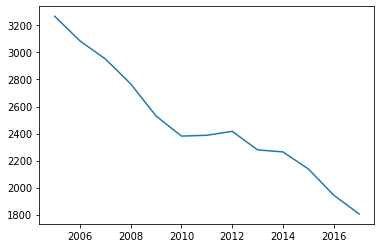

In [28]:
import matplotlib.pyplot as plt

plt.plot(Year, EmilyCount)

In [23]:
Emily

,YEAR,Gender,RANK,Name,Count


In [32]:
firstname = []
for names in Top_Movies_DF_clean['characters']:
    for i in range(0,len(names)):
        firstname.append(names[i].split()[0].upper())

print(firstname)

In [37]:
for name in firstname:
    NameCount = BabyNames[BabyNames['Name']==name]['Count']
    Year = BabyNames[BabyNames['Name']==name]['YEAR']

    if NameCount.sum() != 0:
        import matplotlib.pyplot as plt

        plt.plot(Year, NameCount)
        file = f'Resources/{name}.png'
        plt.savefig(file)
        plt.clf()

<Figure size 432x288 with 0 Axes>

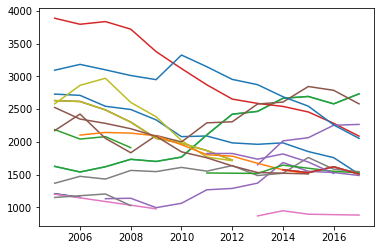

<Figure size 432x288 with 0 Axes>

In [38]:
for name in firstname:
    NameCount = BabyNames[BabyNames['Name']==name]['Count']
    Year = BabyNames[BabyNames['Name']==name]['YEAR']

    if NameCount.sum() != 0:
        import matplotlib.pyplot as plt

        plt.plot(Year, NameCount)

file = f'Resources/AllNames.png'
plt.show()
plt.savefig(file)
plt.clf()

In [56]:
for row in Top_Movies_DF_clean.index:
    Top_Movies_DF_clean['characters'][row] = str(Top_Movies_DF_clean['characters'][row])

C:\Users\farad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [85]:
release_date = Top_Movies_DF_clean[Top_Movies_DF_clean['characters'].str.contains('Jacob')]['release_date'].values[0].split('-')[0]
release_date

'2016'

In [109]:
Count = list(BabyNames[BabyNames['Name']=='JACOB']['Count'])
Year = list(BabyNames[BabyNames['Name']=='JACOB']['YEAR'])

In [110]:
Year

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

In [97]:
ReleaseYearIndex = Year.index(int(release_date))
Year[:ReleaseYearIndex]

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

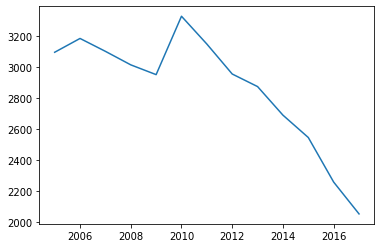

In [98]:
import matplotlib.pyplot as plt

plt.plot(Year, Count)

In [107]:
ReleaseYearIndex = Year.index(int(release_date))

PreReleaseYears = Year[:ReleaseYearIndex]
PostReleaseYears = Year[ReleaseYearIndex:]

PreReleaseCount = Count[:ReleaseYearIndex]
PostReleaseCount = Count[ReleaseYearIndex:]

-48.39090909090909


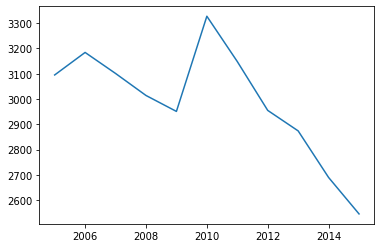

In [108]:
plt.plot(PreReleaseYears, PreReleaseCount)
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
(preslope, intercept, _, _, _) = linregress(PreReleaseYears, PreReleaseCount)
print(preslope)

-205.0


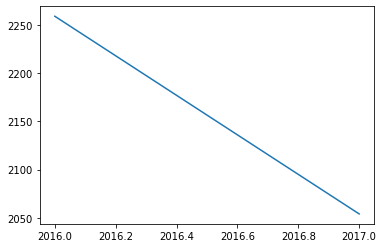

In [105]:
plt.plot(PostReleaseYears, PostReleaseCount)
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
(postslope, intercept, _, _, _) = linregress(PostReleaseYears, PostReleaseCount)
print(postslope)

In [106]:
if postslope > preslope:
    print("This data is relevant.")
else:
    print("This data has no correlation between movie release and name popularity.")

This data has no correlation between movie release and name popularity.
